In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [21]:
df = pd.read_csv('source/FReDA4.csv')

In [ ]:
traits = [
    # "Relationship Length",
    # "Married",
    # "Cohabitation",
    "Kids"
]
t = traits[0].split()[0]

df_couple = df.melt(
    id_vars=["Group2", "Wish for Touch"],
    value_vars=traits,
    var_name="Trait",
    value_name="Score"
)

df_couple_summ = (
    df_couple
    .groupby(["Trait", "Group2"], observed=True)["Score"]
    .agg(['mean', 'std', 'median'])
    .reset_index()
)
means = df_couple.groupby(["Trait", "Group2"], as_index=False)["Score"].mean()

baseline = means.loc[means["Group2"] == "Couple Agreement", ["Trait", "Score"]]
baseline = baseline.rename(columns={"Score": "Baseline"})

mean_baseline = baseline["Baseline"].mean()

df_plot = df_couple
df_plot["Deviation"] = df_plot["Score"] - mean_baseline
df_plot = df_plot[df_plot["Group2"] != "Couple Agreement"]

group_order = sorted(df_plot["Group2"].unique())

colors = sns.color_palette('Set3', 5)
plt.figure(figsize=(8, 6))

sns.barplot(
    data=df_plot,
    x="Trait",
    y="Deviation",
    hue="Group2",
    hue_order=group_order,  # alphabetical
    errorbar="se",
    palette=colors
)
plt.ylabel("")
plt.xlabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.02))
plt.savefig(f'output/img_bg/alles/{t}.png', dpi=600, transparent=False, bbox_inches='tight')

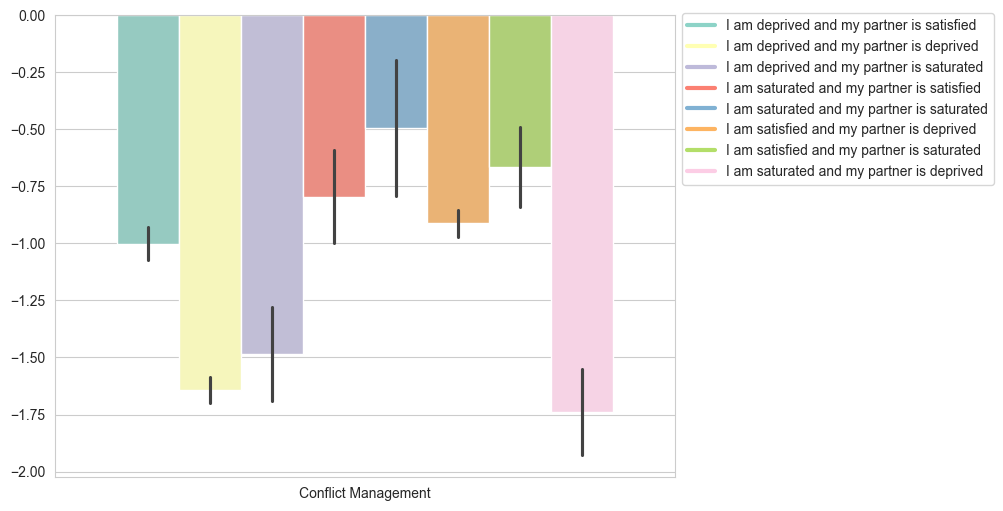

In [44]:
traits = [
    # "Age",
    # "Sex",
    # "Work Status",
    # "Neuroticism",
    # "Extraversion",
    # "Openness",
    # "Agreeableness",
    # "Conscientiousness",
    # "Depressiveness",
    # "Loneliness",
    # "Self-esteem",
    # "Life Satisfaction",
    # "Health",
    # "Communication Quality",
    # "Relationship Satisfaction",
    "Conflict Management",
]
t = traits[0].split()[0]

df_couple = df.melt(
    id_vars=["Group1", "Wish for Touch"],
    value_vars=traits,
    var_name="Trait",
    value_name="Score"
)

df_couple_summ = (
    df_couple
    .groupby(["Trait", "Group1"], observed=True)["Score"]
    .agg(['mean', 'std', 'median'])
    .reset_index()
)
means = df_couple.groupby(["Trait", "Group1"], as_index=False)["Score"].mean()

baseline = means.loc[means["Group1"] == "SubGroup1", ["Trait", "Score"]]
baseline = baseline.rename(columns={"Score": "Baseline"})

mean_baseline = baseline["Baseline"].mean()

df_plot = df_couple
df_plot["Deviation"] = df_plot["Score"] - mean_baseline
df_plot = df_plot[df_plot["Group1"] != "SubGroup1"]

group_order = sorted(df_plot["Group1"].unique())

colors = sns.color_palette('Set3', 8)
plt.figure(figsize=(8, 6))

group_labels = [
    'I am deprived and my partner is satisfied', 'I am deprived and my partner is deprived',
    'I am deprived and my partner is saturated', 'I am saturated and my partner is satisfied',
    'I am saturated and my partner is saturated', 'I am satisfied and my partner is deprived',
    'I am satisfied and my partner is saturated', 'I am saturated and my partner is deprived'
]

sns.barplot(
    data=df_plot,
    x="Trait",
    y="Deviation",
    hue="Group1",
    hue_order=group_order,  # alphabetical
    errorbar="se",
    palette=colors
)

handles = [
    plt.Line2D([0], [0], color=colors[i], lw=3, label=group_labels[i])
    for i in range(len(group_labels))
]
plt.legend(handles=handles, labels=group_labels, loc='upper left', bbox_to_anchor=(1.0, 1.02))

plt.ylabel("")
plt.xlabel("")
plt.savefig(f'output/img_bg/alles/{t}.png', dpi=600, transparent=False, bbox_inches='tight')